In [26]:
import matplotlib.pyplot as plt
import pandas


In [2]:
Tweet= pandas.read_csv("Tweets.csv")
Tweet.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [3]:
MoodCount=Tweet['airline_sentiment'].value_counts()

Text(0.5,1,'Count of Moods')

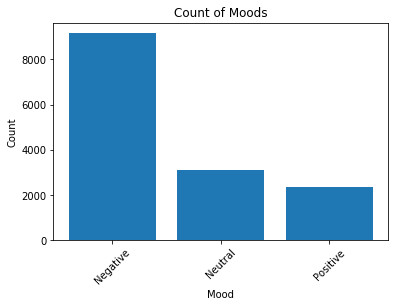

In [4]:
Index = [1,2,3]
plt.bar(Index,MoodCount)
plt.xticks(Index,['Negative','Neutral','Positive'],rotation=45)
plt.ylabel('Count')
plt.xlabel('Mood')
plt.title('Count of Moods')

In [5]:
del Tweet['tweet_coord']
del Tweet['airline_sentiment_gold']
del Tweet['negativereason_gold']

In [6]:
Tweet['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

In [7]:
NegReason_Count=dict(Tweet['negativereason'].value_counts(sort=False))

In [8]:
def NegReason_Count(Airline):
    df=Tweet
    count=dict(df['negativereason'].value_counts())
    Unique_reason=list(Tweet['negativereason'].unique())
    Unique_reason=[x for x in Unique_reason if str(x) != 'nan']
    Reason_frame=pandas.DataFrame({'Reasons':Unique_reason})
    Reason_frame['count']=Reason_frame['Reasons'].apply(lambda x: count[x])
    return Reason_frame

In [9]:
def ReasonPlot(Airline):
    df=NegReason_Count(Airline)
    count=df['count']
    Index = range(1,(len(df)+1))
    plt.bar(Index,count)
    plt.xticks(Index,df['Reasons'],rotation=90)
    plt.ylabel('Count')
    plt.xlabel('Reason')
    plt.title('Count of Reasons')

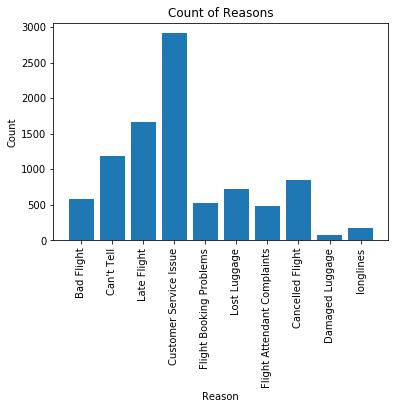

In [10]:
ReasonPlot('All')

In [11]:
from wordcloud import WordCloud,STOPWORDS

In [12]:
df=Tweet[Tweet['airline_sentiment']=='negative']
words = ' '.join(df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [13]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

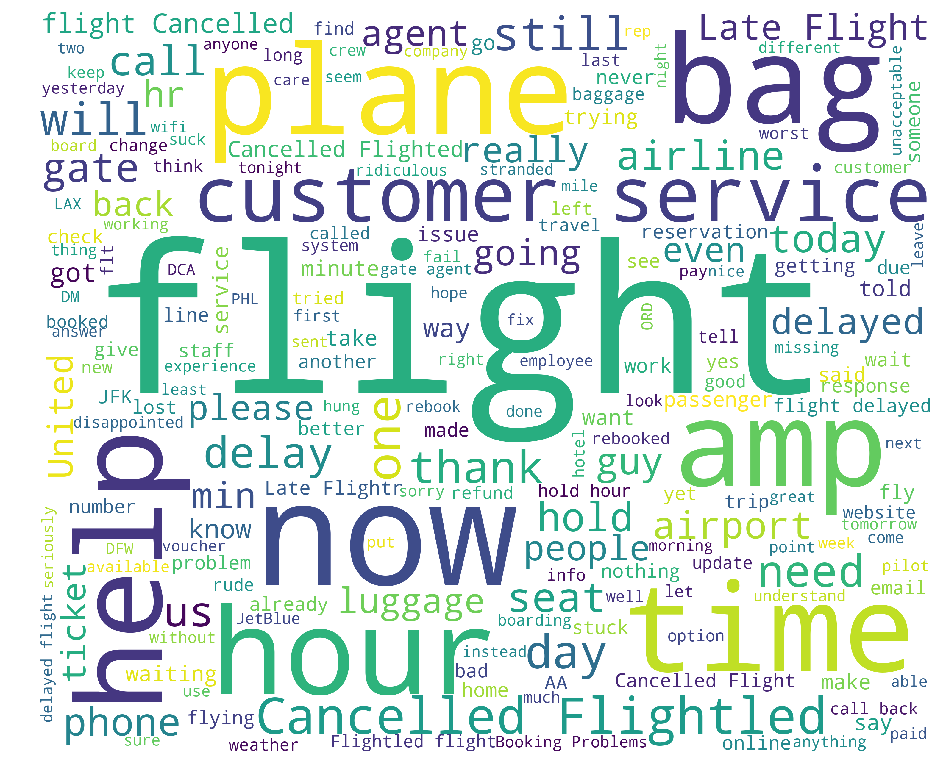

In [14]:
plt.figure(1,figsize=(16, 16))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [15]:
import re, nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
wordnet_lemmatizer = WordNetLemmatizer()

def normalizer(Tweet):
    only_letters = re.sub("[^a-zA-Z]", " ",Tweet) 
    tokens = nltk.word_tokenize(only_letters)[2:]
    lower_case = [l.lower() for l in tokens]
    filtered_result = list(filter(lambda l: l not in stop_words, lower_case))
    lemmas = [wordnet_lemmatizer.lemmatize(t) for t in filtered_result]
    return lemmas

In [17]:
normalizer("I love the service of United Airlines")

['service', 'united', 'airline']

In [20]:
pandas.set_option('display.max_colwidth', -1) # Setting this so we can see the full content of cells
Tweet['normalized_tweet'] = Tweet.text.apply(normalizer)
Tweet[['text','normalized_tweet']].head()

,text,normalized_tweet
0,@VirginAmerica What @dhepburn said.,"[dhepburn, said]"
1,@VirginAmerica plus you've added commercials to the experience... tacky.,"[added, commercial, experience, tacky]"
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,"[today, must, mean, need, take, another, trip]"
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse","[really, aggressive, blast, obnoxious, entertainment, guest, face, amp, little, recourse]"
4,@VirginAmerica and it's a really big bad thing about it,"[really, big, bad, thing]"


In [22]:
from nltk import ngrams
def ngrams(input_list):
    #onegrams = input_list
    bigrams = [' '.join(t) for t in list(zip(input_list, input_list[1:]))]
    trigrams = [' '.join(t) for t in list(zip(input_list, input_list[1:], input_list[2:]))]
    return bigrams+trigrams
Tweet['grams'] = Tweet.normalized_tweet.apply(ngrams)
Tweet[['grams']].head()

,grams
0,[dhepburn said]
1,"[added commercial, commercial experience, experience tacky, added commercial experience, commercial experience tacky]"
2,"[today must, must mean, mean need, need take, take another, another trip, today must mean, must mean need, mean need take, need take another, take another trip]"
3,"[really aggressive, aggressive blast, blast obnoxious, obnoxious entertainment, entertainment guest, guest face, face amp, amp little, little recourse, really aggressive blast, aggressive blast obnoxious, blast obnoxious entertainment, obnoxious entertainment guest, entertainment guest face, guest face amp, face amp little, amp little recourse]"
4,"[really big, big bad, bad thing, really big bad, big bad thing]"


In [23]:
import collections
def count_words(input):
    cnt = collections.Counter()
    for row in input:
        for word in row:
            cnt[word] += 1
    return cnt

In [24]:
Tweet[(Tweet.airline_sentiment == 'positive')][['grams']].apply(count_words)['grams'].most_common(20)

[('http co', 233),
 ('customer service', 91),
 ('flight attendant', 25),
 ('quick response', 19),
 ('great flight', 17),
 ('best airline', 16),
 ('great job', 16),
 ('great service', 16),
 ('gate agent', 16),
 ('booking problem', 15),
 ('thanks help', 15),
 ('thank much', 15),
 ('good work', 14),
 ('fleet fleek', 14),
 ('fleek http', 14),
 ('fleet fleek http', 14),
 ('fleek http co', 14),
 ('guy rock', 13),
 ('looking forward', 13),
 ('great customer', 12)]

In [25]:
Tweet[(Tweet.airline_sentiment == 'negative')][['grams']].apply(count_words)['grams'].most_common(20)

[('http co', 449),
 ('customer service', 438),
 ('cancelled flightled', 425),
 ('late flight', 215),
 ('cancelled flighted', 196),
 ('flight cancelled', 185),
 ('late flightr', 144),
 ('cancelled flight', 131),
 ('hold hour', 128),
 ('flightled flight', 123),
 ('flight cancelled flightled', 117),
 ('flight delayed', 115),
 ('cancelled flightled flight', 107),
 ('call back', 106),
 ('booking problem', 98),
 ('gate agent', 83),
 ('flight flight', 74),
 ('hour late', 69),
 ('delayed flight', 69),
 ('flight attendant', 60)]

In [27]:
import numpy as np
from scipy.sparse import hstack
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(ngram_range=(1,2))

In [29]:
vectorized_data = count_vectorizer.fit_transform(Tweet.text)
indexed_data = hstack((np.array(range(0,vectorized_data.shape[0]))[:,None], vectorized_data))

In [30]:
def sentiment2target(sentiment):
    return {
        'negative': 0,
        'neutral': 1,
        'positive' : 2
    }[sentiment]
targets = Tweet.airline_sentiment.apply(sentiment2target)

In [31]:
from sklearn.model_selection import train_test_split
data_train, data_test, targets_train, targets_test = train_test_split(indexed_data, targets, test_size=0.4, random_state=0)
data_train_index = data_train[:,0]
data_train = data_train[:,1:]
data_test_index = data_test[:,0]
data_test = data_test[:,1:]

In [32]:
from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier
clf = OneVsRestClassifier(svm.SVC(gamma=0.01, C=100., probability=True, class_weight='balanced', kernel='linear'))
clf_output = clf.fit(data_train, targets_train)

In [33]:
clf.score(data_test, targets_test)

0.7851775956284153